In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [2]:
df = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data Science Assignments/Assignmnet 7 - Clustering/crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# lets name the unnamed 1st col to city
df= df.rename({'Unnamed: 0':'City'},axis=1)

In [4]:
# using min max scaler to nomalize data
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
df_norm = pd.DataFrame(trans.fit_transform(df.iloc[:,1:]))
df_norm.head()

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


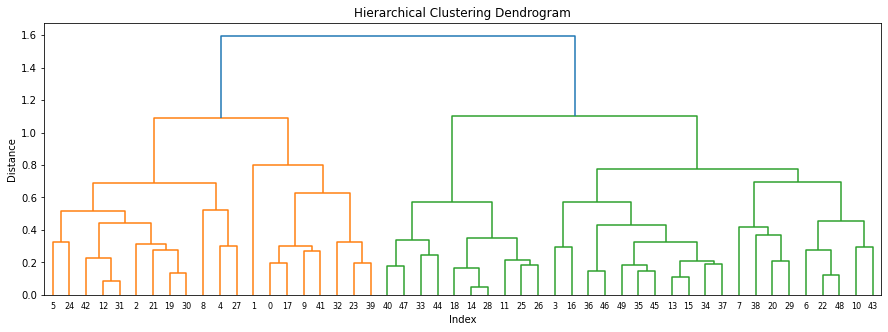

In [5]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [6]:
# seeing the dendogram at 0.8, we get # of clusters = 4
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df['clust']=cluster_labels # creating a  new column and assigning it to new column 
df.head()

,City,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [7]:
df.iloc[:,1:].groupby(df.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,14.087500,252.750000,53.500000,24.5375,0
1,5.715000,132.300000,70.800000,18.1000,1
2,3.180000,78.700000,49.300000,11.6300,2
3,10.883333,256.916667,78.333333,32.2500,3


Text(0.5, 0.98, '# of cities in respective clusters')

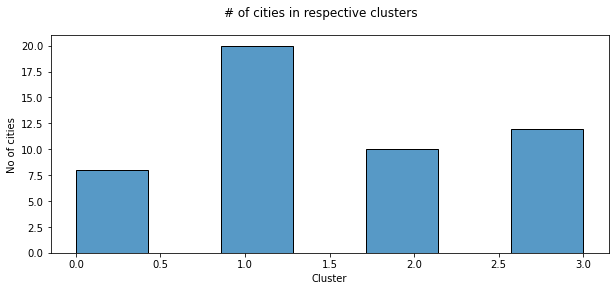

In [8]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.histplot (x='clust', data=df)
plt.xlabel('Cluster')
plt.ylabel('No of cities')
plt.suptitle('# of cities in respective clusters')